# **FordGoBike 2019** - Data Analysis and Visualization
## By Jeet

## Investigation Overview

> In this analysis, I would like to figure that when and where are most trips taken and the relation between them.

## Dataset Overview

> This dataset includes 1208719 trips with features like locations, time. The dataset is subset of the actual dataset from which all the unrequired or unecessary data has been cleaned which holds data for FordGoBike riders. This Dataset holds data from month of May to October

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
master = pd.read_csv('master_fordgobike2019.csv')


In [9]:
base_color = color = '#006400'

## Top 10 Stations with Most Trips

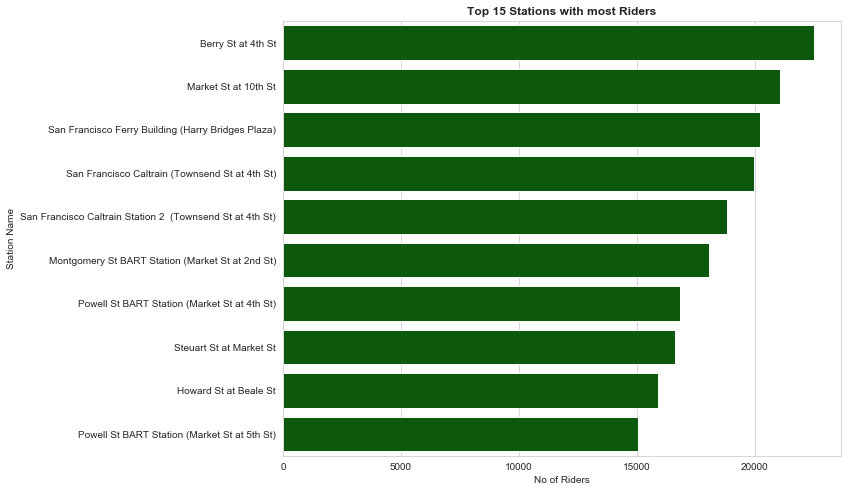

In [11]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize = (10,8))
#plotting
sb.countplot(data = master, y = master.start_station_name,color = base_color, order = master.start_station_name.value_counts()[:10].index);
#title, xlabel and ylabel
plt.xlabel('No of Riders');
plt.ylabel('Station Name');
plt.title('Top 15 Stations with most Riders', fontweight = 'bold');

## Most Trip Times
1. Month with Most Rides - **Ocotober(10)**
2. Day with most Rides - **Wednesday**
3. Hour with the Most Rides - **17th, 18th and 8th hour** in order

In [18]:
#Mapping day number to dayname
dday = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
master['dayname'] = master['weekday'].map(dday)
master['dayname'].value_counts()

Wednesday    211714
Thursday     208039
Tuesday      206285
Friday       187752
Monday       187654
Saturday     107690
Sunday        99585
Name: dayname, dtype: int64

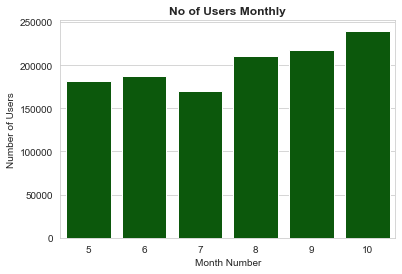

In [12]:
#Setting style
sb.set_style('whitegrid');
#Plotting
ax = sb.countplot(data = master, x = 'month',color = base_color);
#Title, xlabel and ylabel
plt.title('No of Users Monthly', weight = 'bold');
ax.set(xlabel="Month Number", ylabel = "Number of Users");

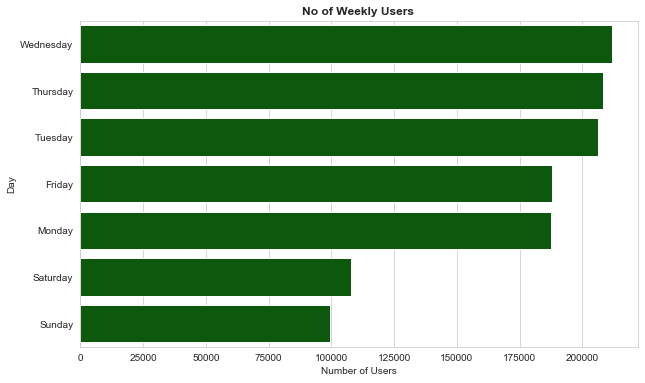

In [20]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize = (10,6))
#Plotting horizontally
ax = sb.countplot(data = master, y = master['dayname'],color = base_color, order = master['dayname'].value_counts().index);
#Title, xlabel and ylabel
plt.title('No of Weekly Users ', weight = 'bold');
labels = ['0','25000','50000','75000', '100000','125000', '150000','175000', '200000']
ax.set_xticklabels(labels)
ax.set(xlabel='Number of Users', ylabel = "Day");

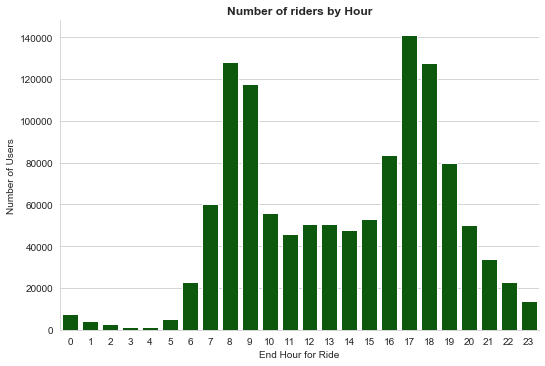

In [17]:
#Setting style
sb.set_style('whitegrid');
#plotting
graph = sb.catplot(data = master, x='e_time_hr', kind='count', color = base_color , height = 5, aspect = 1.5)
#Title, xlabel and ylabel
graph.set_axis_labels('End Hour for Ride', 'Number of Users')
plt.title('Number of riders by Hour', fontweight='bold');

## Station with Least Number of Rides

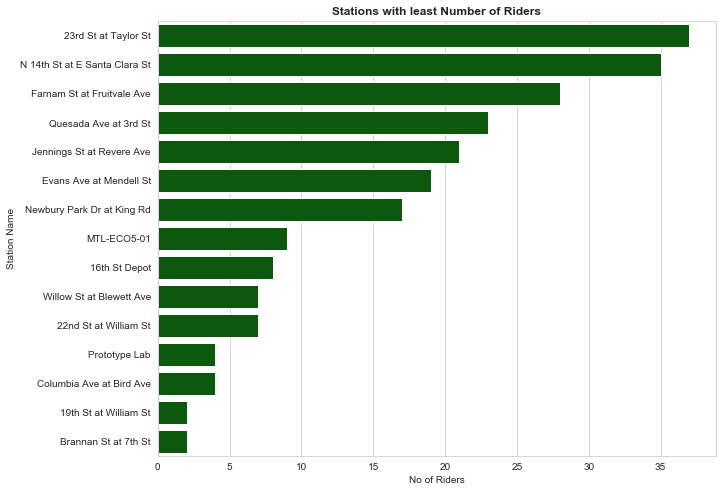

In [32]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize = (10,8))
#plotting
sb.countplot(data = master, y = master.start_station_name,color = base_color, order = master.start_station_name.value_counts()[-15:].index);
#title, xlabel and ylabel
plt.xlabel('No of Riders');
plt.ylabel('Station Name');
plt.title('Stations with least Number of Riders', fontweight = 'bold');

## Percentage of Bike Sharing users
* **92.77%** users dont share a bike

In [21]:
#Calculating Proportion of bike users
bike_share = len(master.query('bike_share_for_all_trip == "Yes"')) /  len(master.bike_share_for_all_trip)
no_bike_share = len(master.query('bike_share_for_all_trip == "No"')) /  len(master.bike_share_for_all_trip)

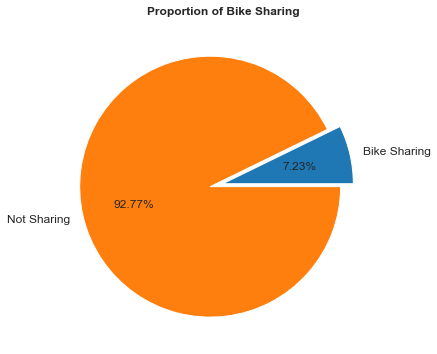

In [22]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize = (6,6))
#Reading proportions
prop = [bike_share, no_bike_share];
#labels
labels =  [ 'Bike Sharing' , 'Not Sharing']
#plotting and title
plt.pie(prop, labels = labels, autopct='%1.2f%%',explode = (0,0.1), textprops={'fontsize': 12});
plt.title('Proportion of Bike Sharing', fontweight = 'bold');

## Percentage of Subscribers
* **79.76%** users are subcribers

In [23]:
#Calculating Proportion of user types
cust_no = len(master.query('user_type== "Customer"')) /  len(master.user_type)
sub_no = len(master.query('user_type== "Subscriber"')) / len(master.user_type)

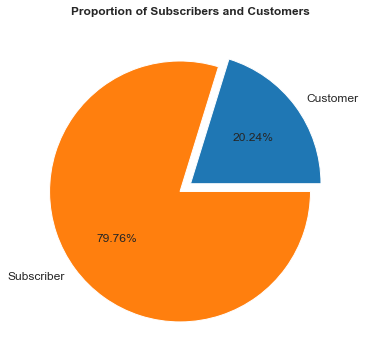

In [24]:
plt.figure(figsize = (6,6))
#Reading proportions
prop = [cust_no, sub_no];
labels =  [ 'Customer' , 'Subscriber']
#Plotting and title
plt.pie(prop, labels = labels, autopct='%1.2f%%',explode = (0,0.1), textprops={'fontsize': 12});
plt.title('Proportion of Subscribers and Customers', fontweight = 'bold');

## Customers vs Subscribers based on Hour, Day, Month

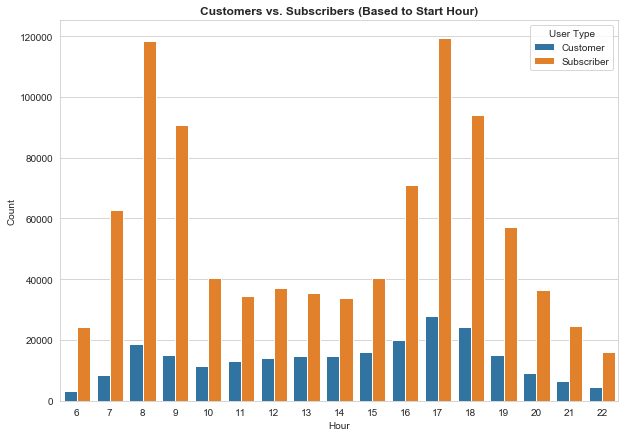

In [25]:
plt.figure(figsize = (10,7));
#setting order on xticks
order = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
sb.countplot(data=master, x='st_time_hr', hue='user_type', order = order);
#title, xlabel and ylabel and legend
plt.title('Customers vs. Subscribers (Based to Start Hour)', fontweight='bold');
plt.legend(title = 'User Type');
plt.xlabel('Hour');
plt.ylabel('Count');
plt.xlim(5.5,22.5);

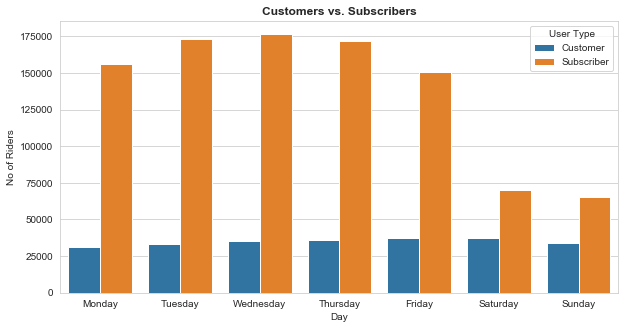

In [26]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize = (10,5));
#list for order on xtick
order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday', 'Sunday'];
#plotting
sb.countplot(data=master, x='dayname', hue="user_type",order = order);
#title, xlabel and ylabel and legend
plt.title('Customers vs. Subscribers', fontweight='bold');
plt.legend(title = 'User Type');
plt.xlabel('Day');
plt.ylabel('No of Riders');

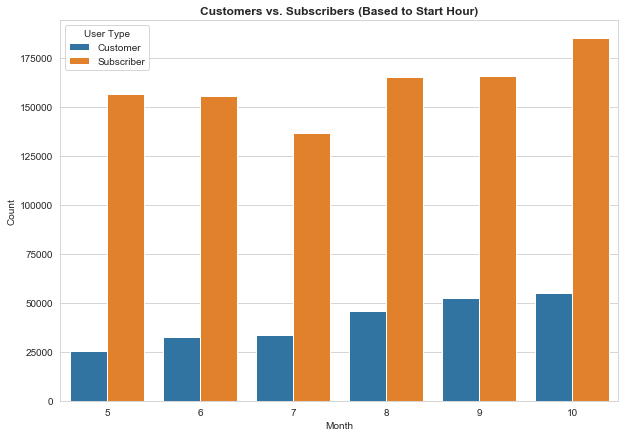

In [27]:
plt.figure(figsize = (10,7));
order = [5,6,7,8,9,10]
#plotting
sb.countplot(data=master, x='month', hue='user_type', order = order);
#title, xlabel and ylabel and legend
plt.title('Customers vs. Subscribers (Based to Start Hour)', fontweight='bold');
plt.legend(title = 'User Type');
plt.xlabel('Month');
plt.ylabel('Count');

## Trend between Duration, Hour of the Day

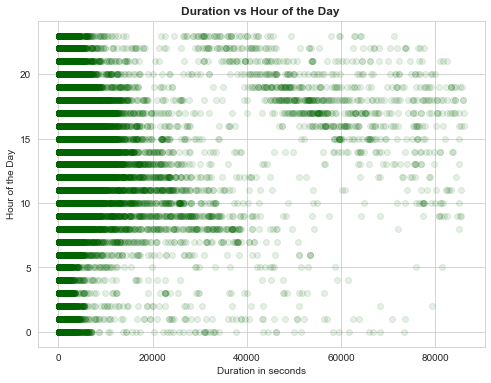

In [28]:
# scatter plot of Duration vs Hour of the Day

plt.figure(figsize = [8, 6])
plt.scatter(data = master, x = 'duration_sec', y = 'st_time_hr', alpha = 1/10, color = base_color)
#Title, Xlabel and Ylabel
plt.title('Duration vs Hour of the Day ', fontweight = 'bold')
plt.xlabel('Duration in seconds')
plt.ylabel('Hour of the Day')
plt.show()

## Relation of Subscriber and Customer with Day of the Week, Hour of the Day

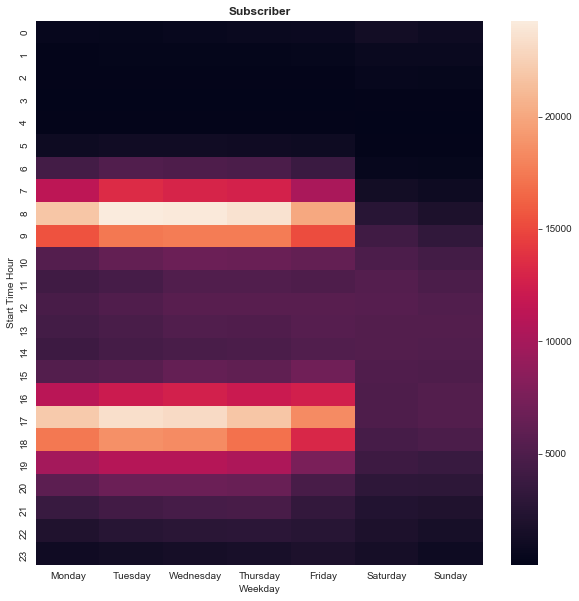

In [30]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize=(10,10))
#setting list for weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
#Converting to categories
master['dayname'] = pd.Categorical(master['dayname'], categories= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True);
#grouping by start timehr and dayname
df_sub = master.query('user_type == "Subscriber"').groupby(['st_time_hr', 'dayname'])['bike_id'].size().reset_index();
df_sub = df_sub.pivot('st_time_hr', 'dayname', 'bike_id')
#Plotting heatmap
sb.heatmap(df_sub)
#title, xlabel and ylabel and legend
plt.title('Subscriber', fontweight = 'bold')
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')
plt.show()

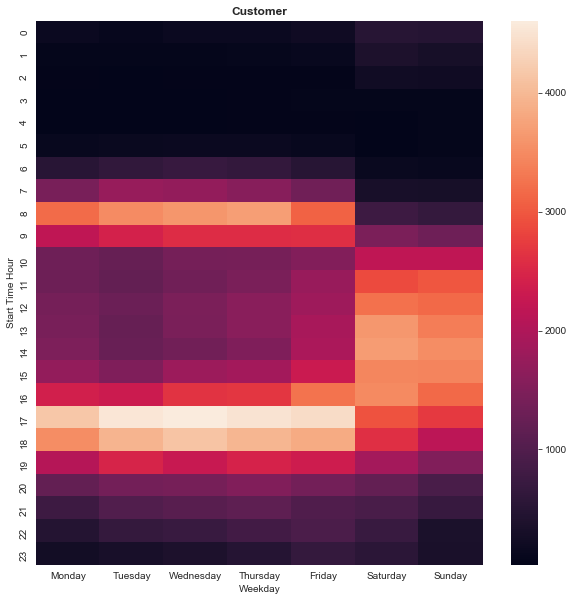

In [31]:
#Setting style
sb.set_style('whitegrid');
plt.figure(figsize=(10,10))
#setting list for weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
#Converting to categories
master['dayname'] = pd.Categorical(master['dayname'], categories= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True);
#grouping by start timehr and dayname
df_cust = master.query('user_type == "Customer"').groupby(['st_time_hr', 'dayname'])['bike_id'].size().reset_index();
df_cust = df_cust.pivot('st_time_hr', 'dayname', 'bike_id')
sb.heatmap(df_cust)
#title, xlabel and ylabel
plt.title('Customer',fontweight = 'bold')
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')
plt.show()

## Summary 
1. 92.77% users dont like to share a bike ride
2. 79.76% are Subscribers whereas only 20.24% are customers
3. **Berry St at 4th St , Market St at 10th St, San Francisco Ferry Building, San Francisco Caltrain** are stations with most number of riders and **Brannan St at 7th**, **19th St at William St** have the least riders i.e. **2**
4. **San Francisco Ferry Building** has an usual high number of customers with comparison to subscribers
5. Majority of the rides happen betweeen the 7th - 9th hour and 15th - 19th hour
6. **Wednesday** is the day with most number of rides in a day with **211714** rides closely followed by **Thursday** and **Tuesday** with **208039** and **206285**
7. Weekends have the fall in number of riders especially **Sunday** with **99585**

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!